<a href="https://colab.research.google.com/github/Ritikasrivasta/ACP/blob/main/Visionary_AI_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example.jpg to example.jpg


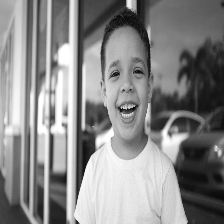

Image saved as grayscale_resized_image.jpg
Processed Image Dimensions: (224, 224)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('example.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

resized_image = cv2.resize(gray_image, (224, 224))

cv2_imshow(resized_image)

# cv2.imshow('Processed Image', resized_image) - Removed as it's disabled in Colab

# key = cv2.waitKey(0) - Removed as cv2_imshow handles display directly

# For saving, you might want to uncomment a line to manually save if needed.
# if key == ord('s'):

# For demonstration, let's just save the image directly if you want it saved always
cv2.imwrite('grayscale_resized_image.jpg', resized_image)
print("Image saved as grayscale_resized_image.jpg")

# else:

#     print("Image not saved")


# cv2.destroyAllWindows() - Removed as cv2_imshow handles display directly

print(f"Processed Image Dimensions: {resized_image.shape}")

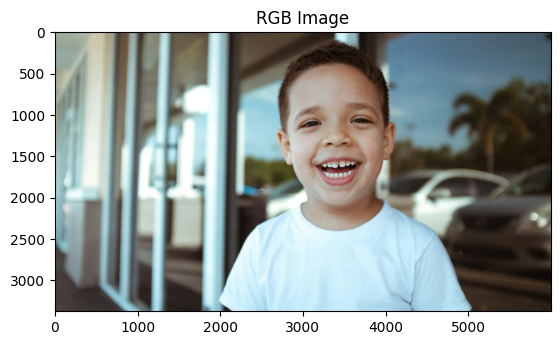

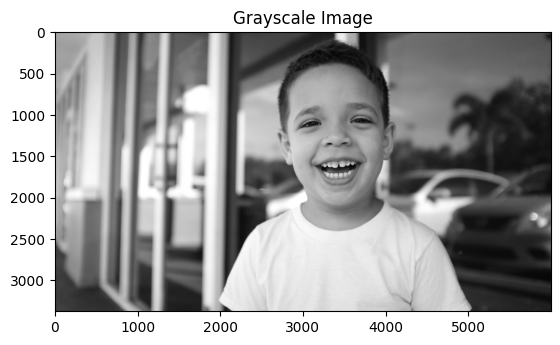

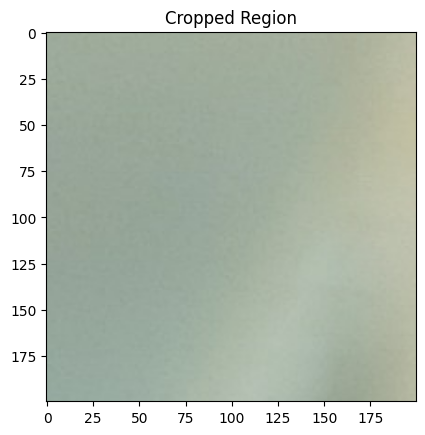

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('example.jpg')

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("RGB Image")
plt.show()

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Cropping the image
# Assume we know the region we want: rows 100 to 300, columns 200 to 400
cropped_image = image[100:300, 200:400]
cropped_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_rgb)
plt.title("Cropped Region")
plt.show()

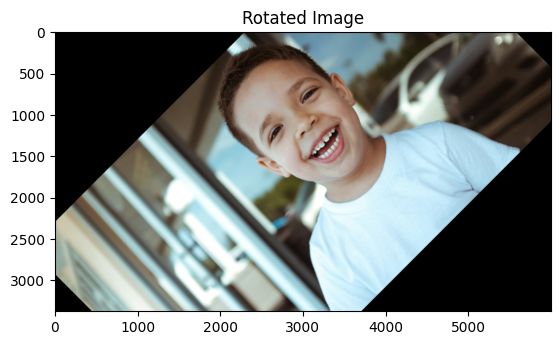

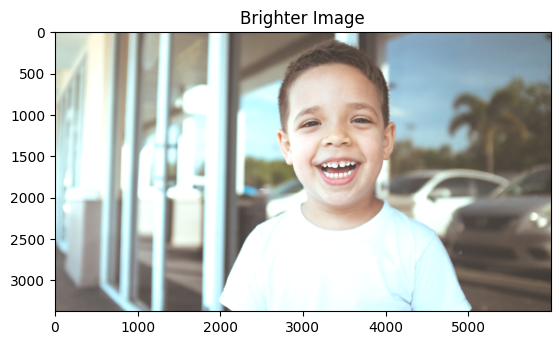

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('example.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Rotate the image by 45 degrees around its center
(h, w) = image.shape[:2]
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)    # rotate by 45 degrees
rotated = cv2.warpAffine(image, M, (w, h))

rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_rgb)
plt.title("Rotated Image")
plt.show()

# Increase brightness by adding 50 to all pixel values
# Use cv2.add to avoid negative values or overflow
brightness_matrix = np.ones(image.shape, dtype="uint8") * 50
brighter = cv2.add(image, brightness_matrix)

brighter_rgb = cv2.cvtColor(brighter, cv2.COLOR_BGR2RGB)
plt.imshow(brighter_rgb)
plt.title("Brighter Image")
plt.show()

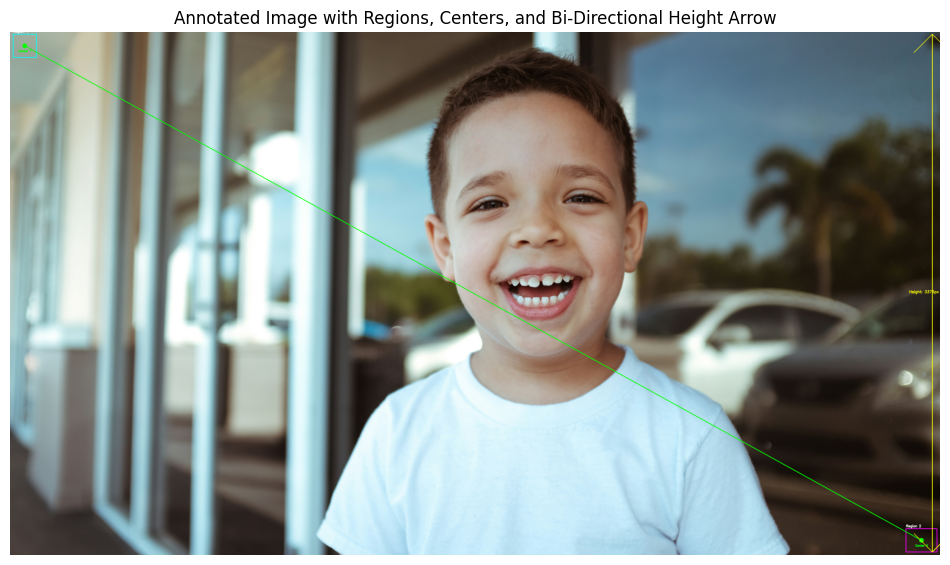

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the Image
image_path = 'example.jpg'  # User-provided image path
image = cv2.imread(image_path)

# Convert BGR to RGB for correct color display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = image_rgb.shape

# Step 2: Draw Two Rectangles Around Interesting Regions
# Rectangle 1: Top-left corner
rect1_width, rect1_height = 150, 150
top_left1 = (20, 20)  # Fixed 20 pixels padding from top-left
bottom_right1 = (top_left1[0] + rect1_width, top_left1[1] + rect1_height)
cv2.rectangle(image_rgb, top_left1, bottom_right1, (0, 255, 255), 3)  # Yellow rectangle

# Rectangle 2: Bottom-right corner
rect2_width, rect2_height = 200, 150
top_left2 = (width - rect2_width - 20, height - rect2_height - 20)  # 20 pixels padding
bottom_right2 = (top_left2[0] + rect2_width, top_left2[1] + rect2_height)
cv2.rectangle(image_rgb, top_left2, bottom_right2, (255, 0, 255), 3)  # Magenta rectangle

# Step 3: Draw Circles at the Centers of Both Rectangles
center1_x = top_left1[0] + rect1_width // 2
center1_y = top_left1[1] + rect1_height // 2
center2_x = top_left2[0] + rect2_width // 2
center2_y = top_left2[1] + rect2_height // 2
cv2.circle(image_rgb, (center1_x, center1_y), 15, (0, 255, 0), -1)  # Filled green circle
cv2.circle(image_rgb, (center2_x, center2_y), 15, (0, 255, 0), -1)  # Filled red circle

# Step 4: Draw Connecting Lines Between Centers of Rectangles
cv2.line(image_rgb, (center1_x, center1_y), (center2_x, center2_y), (0, 255, 0), 3)

# Step 5: Add Text Labels for Regions and Centers
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image_rgb, 'Region 1', (top_left1[0], top_left1[1] - 10), font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(image_rgb, 'Region 2', (top_left2[0], top_left2[1] - 10), font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(image_rgb, 'Center 1', (center1_x - 40, center1_y + 40), font, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
cv2.putText(image_rgb, 'Center 2', (center2_x - 40, center2_y + 40), font, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

# Step 6: Add Bi-Directional Arrow Representing Height
arrow_start = (width - 50, 20)  # Start near the top-right
arrow_end = (width - 50, height - 20)  # End near the bottom-right

# Draw arrows in both directions
cv2.arrowedLine(image_rgb, arrow_start, arrow_end, (255, 255, 0), 3, tipLength=0.05)  # Downward arrow
cv2.arrowedLine(image_rgb, arrow_end, arrow_start, (255, 255, 0), 3, tipLength=0.05)  # Upward arrow

# Annotate the height value
height_label_position = (arrow_start[0] - 150, (arrow_start[1] + arrow_end[1]) // 2)
cv2.putText(image_rgb, f'Height: {height}px', height_label_position, font, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

# Step 7: Display the Annotated Image
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title('Annotated Image with Regions, Centers, and Bi-Directional Height Arrow')
plt.axis('off')
plt.show()

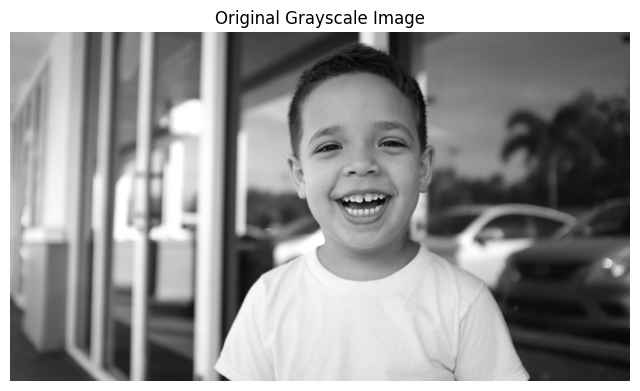

Select an option:
1. Sobel Edge Detection
2. Canny Edge Detection
3. Laplacian Edge Detection
4. Gaussian Smoothing
5. Median Filtering
6. Exit
Enter your choice (1-6): 5
Adjust kernel size for Median filtering (must be odd, default: 5)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Utility function to display an image."""
    plt.figure(figsize=(8, 8))
    if len(image.shape) == 2:  # Grayscale image
        plt.imshow(image, cmap='gray')
    else:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def interactive_edge_detection(image_path):
    """Interactive activity for edge detection and filtering."""
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image("Original Grayscale Image", gray_image)

    print("Select an option:")
    print("1. Sobel Edge Detection")
    print("2. Canny Edge Detection")
    print("3. Laplacian Edge Detection")
    print("4. Gaussian Smoothing")
    print("5. Median Filtering")
    print("6. Exit")

    while True:
        choice = input("Enter your choice (1-6): ")

        if choice == "1":
            # Sobel Edge Detection
            sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
            combined_sobel = cv2.bitwise_or(sobel_x.astype(np.uint8), sobel_y.astype(np.uint8))
            display_image("Sobel Edge Detection", combined_sobel)

        elif choice == "2":
            # Canny Edge Detection
            print("Adjust thresholds for Canny (default: 100 and 200)")
            lower_thresh = int(input("Enter Lower threshold: "))
            upper_thresh = int(input("Enter Upper threshold: "))
            edges = cv2.Canny(gray_image, lower_thresh, upper_thresh)
            display_image("Canny Edge Detection", edges)

        elif choice == "3":
            # Laplacian Edge Detection
            laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
            display_image("Laplacian Edge Detection", np.abs(laplacian).astype(np.uint8))

        elif choice == "4":
            # Gaussian Smoothing
            print("Adjust kernel size for Gaussian blur (must be odd, default: 5)")
            kernel_size = int(input("Enter kernel size (odd number): "))
            blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            display_image("Gaussian Smoothed Image", blurred)

        elif choice == "5":
            # Median Filtering
            print("Adjust kernel size for Median filtering (must be odd, default: 5)")
            kernel_size = int(input("Enter kernel size (odd number): "))
            median_filtered = cv2.medianBlur(image, kernel_size)
            display_image("Median Filtered Image", median_filtered)

        elif choice == "6":
            # Exit
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please select a number between 1 and 6.")

# Provide the path to an image for the activity
interactive_edge_detection('example.jpg')

In [ ]:
import cv2
import numpy as np

def apply_color_filter(image, filter_type):
    """Apply the specified color filter to the image."""
    # Create a copy of the image to avoid modifying the original
    filtered_image = image.copy()
    if filter_type == "red_tint":
        # Remove blue and green channels for red tint
        filtered_image[:, :, 1] = 0  # Green channel to 0
        filtered_image[:, :, 0] = 0  # Blue channel to 0
    elif filter_type == "blue_tint":
        # Remove red and green channels for blue tint
        filtered_image[:, :, 1] = 0  # Green channel to 0
        filtered_image[:, :, 2] = 0  # Red channel to 0
    elif filter_type == "green_tint":
        # Remove blue and red channels for green tint
        filtered_image[:, :, 0] = 0  # Blue channel to 0
        filtered_image[:, :, 2] = 0  # Red channel to 0
    elif filter_type == "increase_red":
        # Increase the intensity of the red channel
        filtered_image[:, :, 2] = cv2.add(filtered_image[:, :, 2], 50)  # Increase red channel
    elif filter_type == "decrease_blue":
        # Decrease the intensity of the blue channel
        filtered_image[:, :, 0] = cv2.subtract(filtered_image[:, :, 0], 50)  # Decrease blue channel
    return filtered_image

# Load the image
image_path = 'example.jpg'  # Provide your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    filter_type = "original"  # Default filter type

    print("Press the following keys to apply filters:")
    print("r - Red Tint")
    print("b - Blue Tint")
    print("g - Green Tint")
    print("i - Increase Red Intensity")
    print("d - Decrease Blue Intensity")
    print("q - Quit")

    while True:
        # Apply the selected filter
        filtered_image = apply_color_filter(image, filter_type)
        # Display the filtered image
        cv2.imshow("Filtered Image", filtered_image)
        # Wait for key press
        key = cv2.waitKey(0) & 0xFF

        # Map key presses to filters
        if key == ord('r'):
            filter_type = "red_tint"
        elif key == ord('b'):
            filter_type = "blue_tint"
        elif key == ord('g'):
            filter_type = "green_tint"
        elif key == ord('i'):
            filter_type = "increase_red"
        elif key == ord('d'):
            filter_type = "decrease_blue"
        elif key == ord('q'):
            print("Exiting...")
            break
        else:
            print("Invalid key! Please use 'r', 'b', 'g', 'i', 'd', or 'q'.")

cv2.destroyAllWindows()